In [40]:
import numpy as np
import matplotlib.pyplot as plt
from array import array 
state_model = [[0.05, 0.9, 0.05], [0.05, 0.1, 0.85]]
meas_model = {'b':{'b':0.6,'g':0.2,'y':0.05,'o':0.05},
              'g':{'b':0.2,'g':0.6,'y':0.05,'o':0.05},
              'y':{'b':0.05,'g':0.05,'y':0.65,'o':0.2},
              'o':{'b':0.05,'g':0.05,'y':0.15,'o':0.6},
              'n':{'b':0.1,'g':0.1,'y':0.1,'o':0.1}
            }#key is z_k (measurement) and value is an array of probabilities of x = {B,G,Y,O}


In [41]:
map = ['y','g','b','o','o','g','b','o','y','g','b'] #topological map
# print(len(map))
# print(curr_state)
actions = [[1,None],[1,'o'],[1,'y'],[1,'g'],[1,'b'],[1,'n'],[1,'g']
          ,[1,'b'],[0,'g'],[1,'o'],[1,'y'],[1,'g'],[1,'b']]
# len(actions)
xvals = []
for i in range(2,13):
    xvals += [i] #xaxis for plotting
# print(xvals)
# print(len(xvals))
# actions[11]

step 0


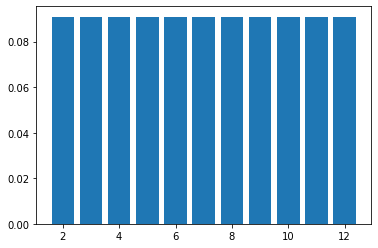

step 1


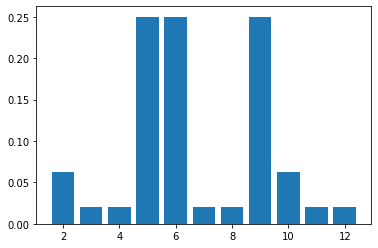

step 2


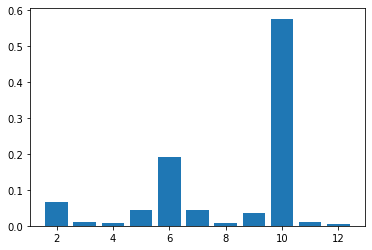

step 3


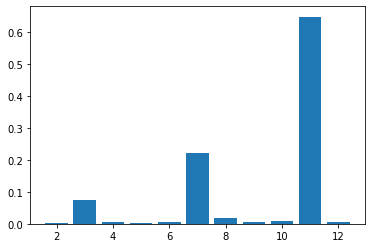

step 4


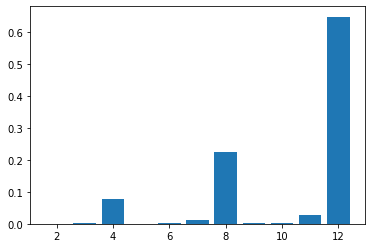

step 5


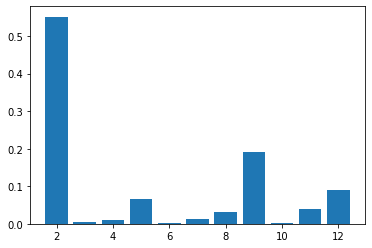

step 6


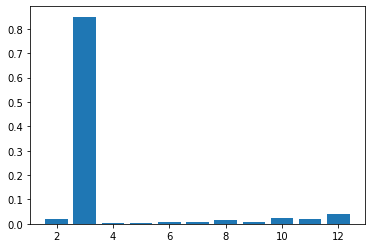

step 7


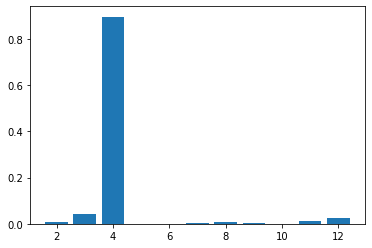

step 8


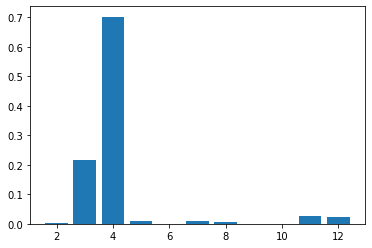

step 9


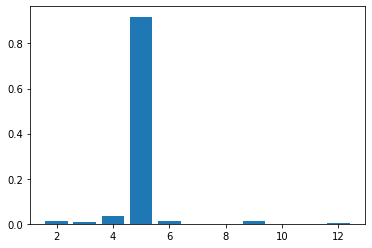

step 10


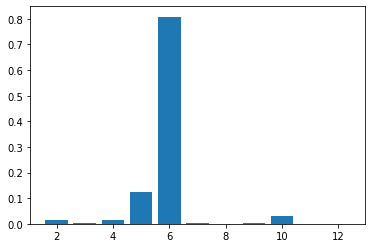

step 11


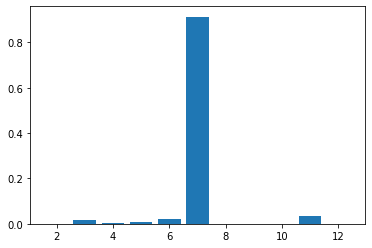

step 12


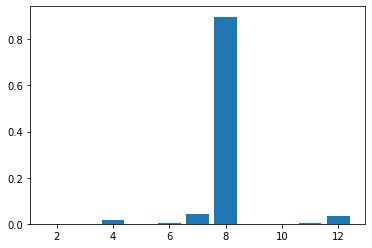

In [43]:
pred= [0]*11
update= [0]*11
norm = [0]*13
steps = [0]+[1]+xvals
# print(steps)
# print(norm)
curr_state = [float(1/11)]*11 #start with uniform distribution
for j in steps: #j is the step 
    u = actions[j][0] #first index gives the control input direction 
    meas = actions[j][1] #measurement taken at step j
    if u != None: 
        for i in range(0,len(curr_state)):
            step_fwd = 0
            step_bwd = 0
            if (i!=0):
                step_fwd = curr_state[i-1]*state_model[u][2]
#                 print('stepfwd',step_fwd)
#           #added
            if (i==0):
                step_fwd = curr_state[len(curr_state)-1]*state_model[u][2]
            if (i==len(curr_state)-1):
                step_bwd = curr_state[0]*state_model[u][0]
            #added
            if (i!=len(curr_state)-1):
                step_bwd = curr_state[i+1]*state_model[u][0]
#                 print('bwd',step_bwd)
            step_none = curr_state[i]*state_model[u][1]
#             print('stepnon',step_none)
            pred[i] = (step_fwd+step_bwd+step_none)
#         print(pred) #pred is a list w/ the prediction at every node 
        if meas==None:
            update = pred
#             print("no meas")
        elif meas != None:
            for k in range(0,len(pred)):
#                 if j==6:
#                     print('meas',meas)
#                     print('mapi',map[i])
#                     print('measurement',meas_model[meas][map[k]])
                update[k] = pred[k]*meas_model[meas][map[k]]
                norm[j] += update[k]
#                 print(update[i])

            update = [float(x/norm[j]) for x in update]
#             print(update) #update is a list w/ the updated prediction at every node
        curr_state = update
    elif u == None:
        if meas==None:
            update = pred
#             print("no meas")
        elif meas != None:
            for k in range(0,len(pred)):
#                 if j==6:
#                     print('meas',meas)
#                     print('mapi',map[i])
#                     print('measurement',meas_model[meas][map[k]])
                update[k] = pred[k]*meas_model[meas][map[k]]
                norm[j] += update[k]
#                 print(update[i])

            update = [float(x/norm[j]) for x in update]
#             print(update) #update is a list w/ the updated prediction at every node
        curr_state = update
    print("step",j)
#     print('update',update)
    plt.figure 
#     plt.plot(xvals,curr_state,'x')
    plt.bar(xvals,curr_state)
    plt.show()